In [22]:
#Project: Detect gender by voice using Python3
#Class: IA1405 - Group: 5
#Members - ID:
    #Duong Cong Phuc - HE141098
    #Vuong Van Vinh - HE141061
    #Hoang Anh Duc - HE141070
    #Dang Cong Hieu - HE141126

In [1]:
#install inaSpeechSegmenter
!sudo apt-get install ffmpeg
!sudo apt-get install virtualenv
!virtualenv -p python3 inaSpeechSegEnv
!source inaSpeechSegEnv/bin/activate
!pip3 install tensorflow
!pip3 install inaSpeechSegmenter

created virtual environment CPython3.8.2.final.0-64 in 504ms
  creator CPython3Posix(dest=/home/admiz/ProjectOSG/inaSpeechSegEnv, clear=False, global=False)
  seeder FromAppData(download=False, pip=latest, idna=latest, distro=latest, setuptools=latest, colorama=latest, html5lib=latest, msgpack=latest, lockfile=latest, contextlib2=latest, progress=latest, pyparsing=latest, packaging=latest, chardet=latest, appdirs=latest, webencodings=latest, ipaddr=latest, requests=latest, pep517=latest, retrying=latest, wheel=latest, six=latest, distlib=latest, CacheControl=latest, pkg_resources=latest, urllib3=latest, certifi=latest, pytoml=latest, via=copy, app_data_dir=/home/admiz/.local/share/virtualenv/seed-app-data/v1.0.1.debian)
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator
     |████████████████████████████████| 516.3 MB 5.8 kB/s eta 0:00:012    |█▎                              | 21.2 MB 4.0 MB/s eta 0:02:054 MB 9.1 MB/s eta 0:00:03

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 13.8 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 2.8 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 92 kB 62 kB/s s eta 0:00:01
     |████████████████████████████████| 753.2 MB 14 kB/s  eta 0:00:019
     |████████████████████████████████| 6.6 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 11.8 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
#install pyaudio & playsound

!pip3 install playsound
!pip3 install librosa

     |████████████████████████████████| 1.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 18.3 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 409 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 6.3 MB/s eta 0:00:01
  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1612879 sha256=c186d98c29516e43ca4a1a7498402ffaca0f26104d49b42d9cfe3b3fe9e03668
  Stored in directory: /home/admiz/.cache/pip/wheels/11/f0/b0/a8f9944f274bbc0f0159f2268f43dadcfa1cfe50a9007d8e1f
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=23091 sha256=2e4178f0ed7d508ca8e95fb07722606b64bb5404bc7762bfc89a81f04788c309
  Stored in directory: /home/admiz/.cache/pip/wheels/9b/94/80/3673f65684ab97e08999d1460fc1b238df7701805c739791cd
  Created wheel for resampy: filename=resampy-0.2.2-py

In [10]:
#Disable annoying "User warnings"
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Test 250 .wav files from FPT and www.openslr.org/resources/45/ST-AEDS-20180100_1-OS.tgz
#Output: accuracy and running time
#All the result saved to voice.csv
from IPython.display import clear_output
from inaSpeechSegmenter import Segmenter, seg2csv
import os
from csv import writer
import timeit

#Append results to .csv file
def append_list_as_row(file_name, list_of_elem):
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

#Test the .wav files
#Return file numbers (cnt) and accuracy (ex/cnt*100)
def test_result(path, gender, nongender):
    ex = 0
    cnt = 0
    files = os.listdir(path)
    for f in files:
        check = 1
        clear_output(wait=True)
        print('Processed ', cnt, ' files')
        cnt += 1 
        seg = Segmenter()
        segmentation = seg(path + '/' + f)
        for s in segmentation:
            if nongender in s:
                check = 0
                append_list_as_row('voice.csv', [cnt, f, segmentation, 'false'])
                break
        if check == 1:
            ex+=1
            append_list_as_row('voice.csv', [cnt, f, segmentation, 'true'])
    return (ex/cnt*100), cnt
        
if __name__ == '__main__':
    f_path = 'Female' #path of female test data files
    m_path = 'Male' #path of male test data files
    start = timeit.default_timer() #start counting runtime
    f_acc, f_num = test_result(f_path, 'female', 'male')
    m_acc, m_num = test_result(m_path, 'male', 'female')
    stop = timeit.default_timer() #stop counting runtime
    clear_output(wait=True) #Clear old outputs
    print('-Tested: ', f_num + m_num, ' files')
    print('\tFemales: ', f_num, ' files')
    print('\tMales: ', m_num, ' files')
    print('-Acuraccy:')
    print('\tFemale: ', f_acc, '%')
    print('\tMales: ', m_acc, '%')
    print('Process time: ', (stop - start), 's')
    print('Press Enter to refresh kernel')
    input()
    %reset

Processed  19  files


In [20]:
#First, user enter the name of the file to save
#Second, if user ready, press Enter and start recording
#Recording will stop if user keep silence

from sys import byteorder
from array import array
from struct import pack

import pyaudio
import wave

THRESHOLD = 1000
CHUNK_SIZE = 1024
FORMAT = pyaudio.paInt16
RATE = 44100

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)

    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r

def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r

    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data

def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    silence = [0] * int(seconds * RATE)
    r = array('h', silence)
    r.extend(snd_data)
    r.extend(silence)
    return r

def record():
    """
    Record a word or words from the microphone and 
    return the data as an array of signed shorts.

    Normalizes the audio, trims silence from the 
    start and end, and pads with 0.5 seconds of 
    blank sound to make sure VLC et al can play 
    it without getting chopped off.
    """
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE,
        input=True, output=True,
        frames_per_buffer=CHUNK_SIZE)

    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > 30:
            break

    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.5)
    return sample_width, r

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()
    
if __name__ == '__main__':
    print("Firstly, please enter the filename of record file you want to save.")
    print("Secondly press ENTER when you are ready to record.")
    print("Recording will stop when you keep silent.")
    filename = input ("Save filename as: ");
    print("Press enter to start recording")
    input()
    print("Recording.... Please say something")
    record_to_file(filename + ".wav")
    print("Done - result written to "+ filename + ".wav")

Firstly, please enter the filename of record file you want to save.
Secondly press ENTER when you are ready to record.
Recording will stop when you keep silent.
Save filename as: phuc
Press enter to start recording

Recording.... Please say something
Done - result written to phuc.wav


Firstly, please enter the filename of your record.
The program will detect gender by voice in the audio file.
Filename to detect gender: minhtrang
Gender: male ; Time: 0.0 - 3.06


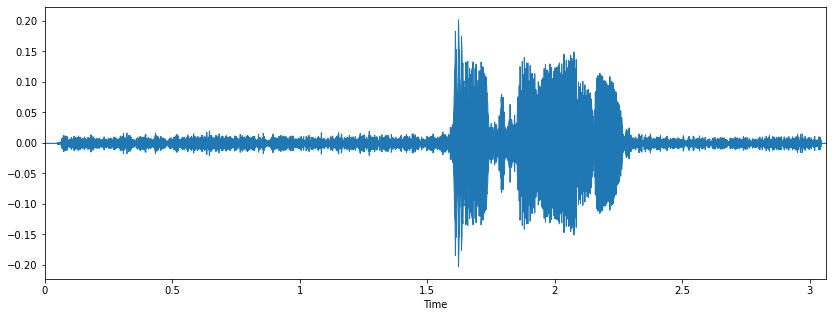

In [17]:
#Using inaSpeechSegmenter to detect file which name is inputed by user
#Display waveplot of audio file using Librosa.display.waveplot
import librosa
import librosa.display
import matplotlib.pyplot as plt
from inaSpeechSegmenter import Segmenter, seg2csv

print("Firstly, please enter the filename of your record.")
print("The program will detect gender by voice in the audio file.")
filename = input ("Filename to detect gender: ");
media = (filename + ".wav")
seg = Segmenter()
segmentation = seg(media)
x, sr = librosa.load(media)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
for info in segmentation:
    if ('male' in info) or ('female' in info):
        print('Gender:', info[0],';', 'Time:', info[1], '-', info[2])

In [12]:
#!/usr/bin/env python3
# Import playsound module
#from playsound import playsound
# Input an existing wav filename
#wavFile = input('Enter filename you want to play: ')
# Play the wav file
#X = librosa.stft(x)
#Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#playsound(wavFile + '.wav')

Filename to play without extension: minhtrang


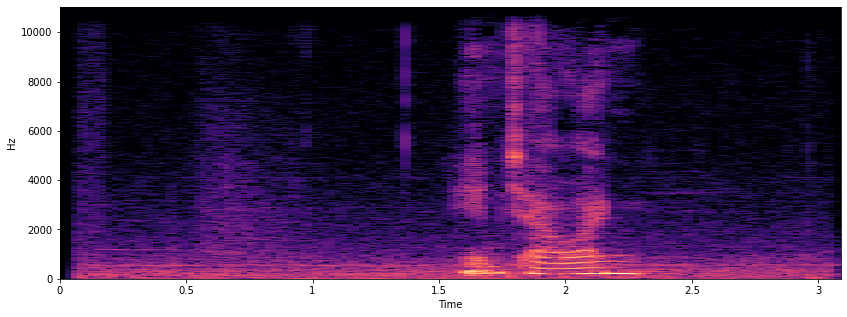

In [18]:
#Using IPython.display to show up a small panel which let user listen to audio, adjust volume
#Using librosa.display.specshow to show the spectrum of audio file
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

fName = input('Filename to play without extension: ')
x, sr = librosa.load(fName+'.wav')
ipd.Audio(fName+'.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')